In [316]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
from sklearn import metrics

In [317]:
df=pd.read_csv('Car details v3.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [319]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [320]:
df.columns[df.isna().any()]

Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')

In [321]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [322]:
df.torque=df.torque.fillna(0)
df.torque

0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2           12.7@ 2,700(kgm@ rpm)
3        22.4 kgm at 1750-2750rpm
4           11.5@ 4,500(kgm@ rpm)
                  ...            
8123             113.7Nm@ 4000rpm
8124    24@ 1,900-2,750(kgm@ rpm)
8125               190Nm@ 2000rpm
8126          140Nm@ 1800-3000rpm
8127          140Nm@ 1800-3000rpm
Name: torque, Length: 8128, dtype: object

In [323]:
df2=df[df.torque==0].head(50)
df2

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,0,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,0,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,0,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,0,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,0,NaN
138,BMW X1 sDrive 20D xLine,2017,2150000,27000,Diesel,Dealer,Automatic,First Owner,NaN,NaN,NaN,0,NaN
200,Toyota Etios GD,2012,235000,120000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,0,NaN
206,Maruti Omni E 8 Str STD,2003,40000,90000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,0,NaN
228,Maruti Swift 1.3 VXi,2008,130000,120000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,0,NaN
252,Tata Indica DLS,2005,75000,110000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,0,NaN


In [324]:
df.dropna(inplace=True)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7907 non-null   object 
 1   year           7907 non-null   int64  
 2   selling_price  7907 non-null   int64  
 3   km_driven      7907 non-null   int64  
 4   fuel           7907 non-null   object 
 5   seller_type    7907 non-null   object 
 6   transmission   7907 non-null   object 
 7   owner          7907 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7907 non-null   object 
 11  torque         7907 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 864.8+ KB


In [326]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [327]:
df['car_age']=2023-df.year
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,9
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,9
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,13
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,10
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,16
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,14
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,10


In [328]:
df.drop('year',axis=1,inplace=True)
df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,9
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,9
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,13
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,10
8124,Hyundai Verna CRDi SX,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,16
8125,Maruti Swift Dzire ZDi,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,14
8126,Tata Indigo CR4,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,10


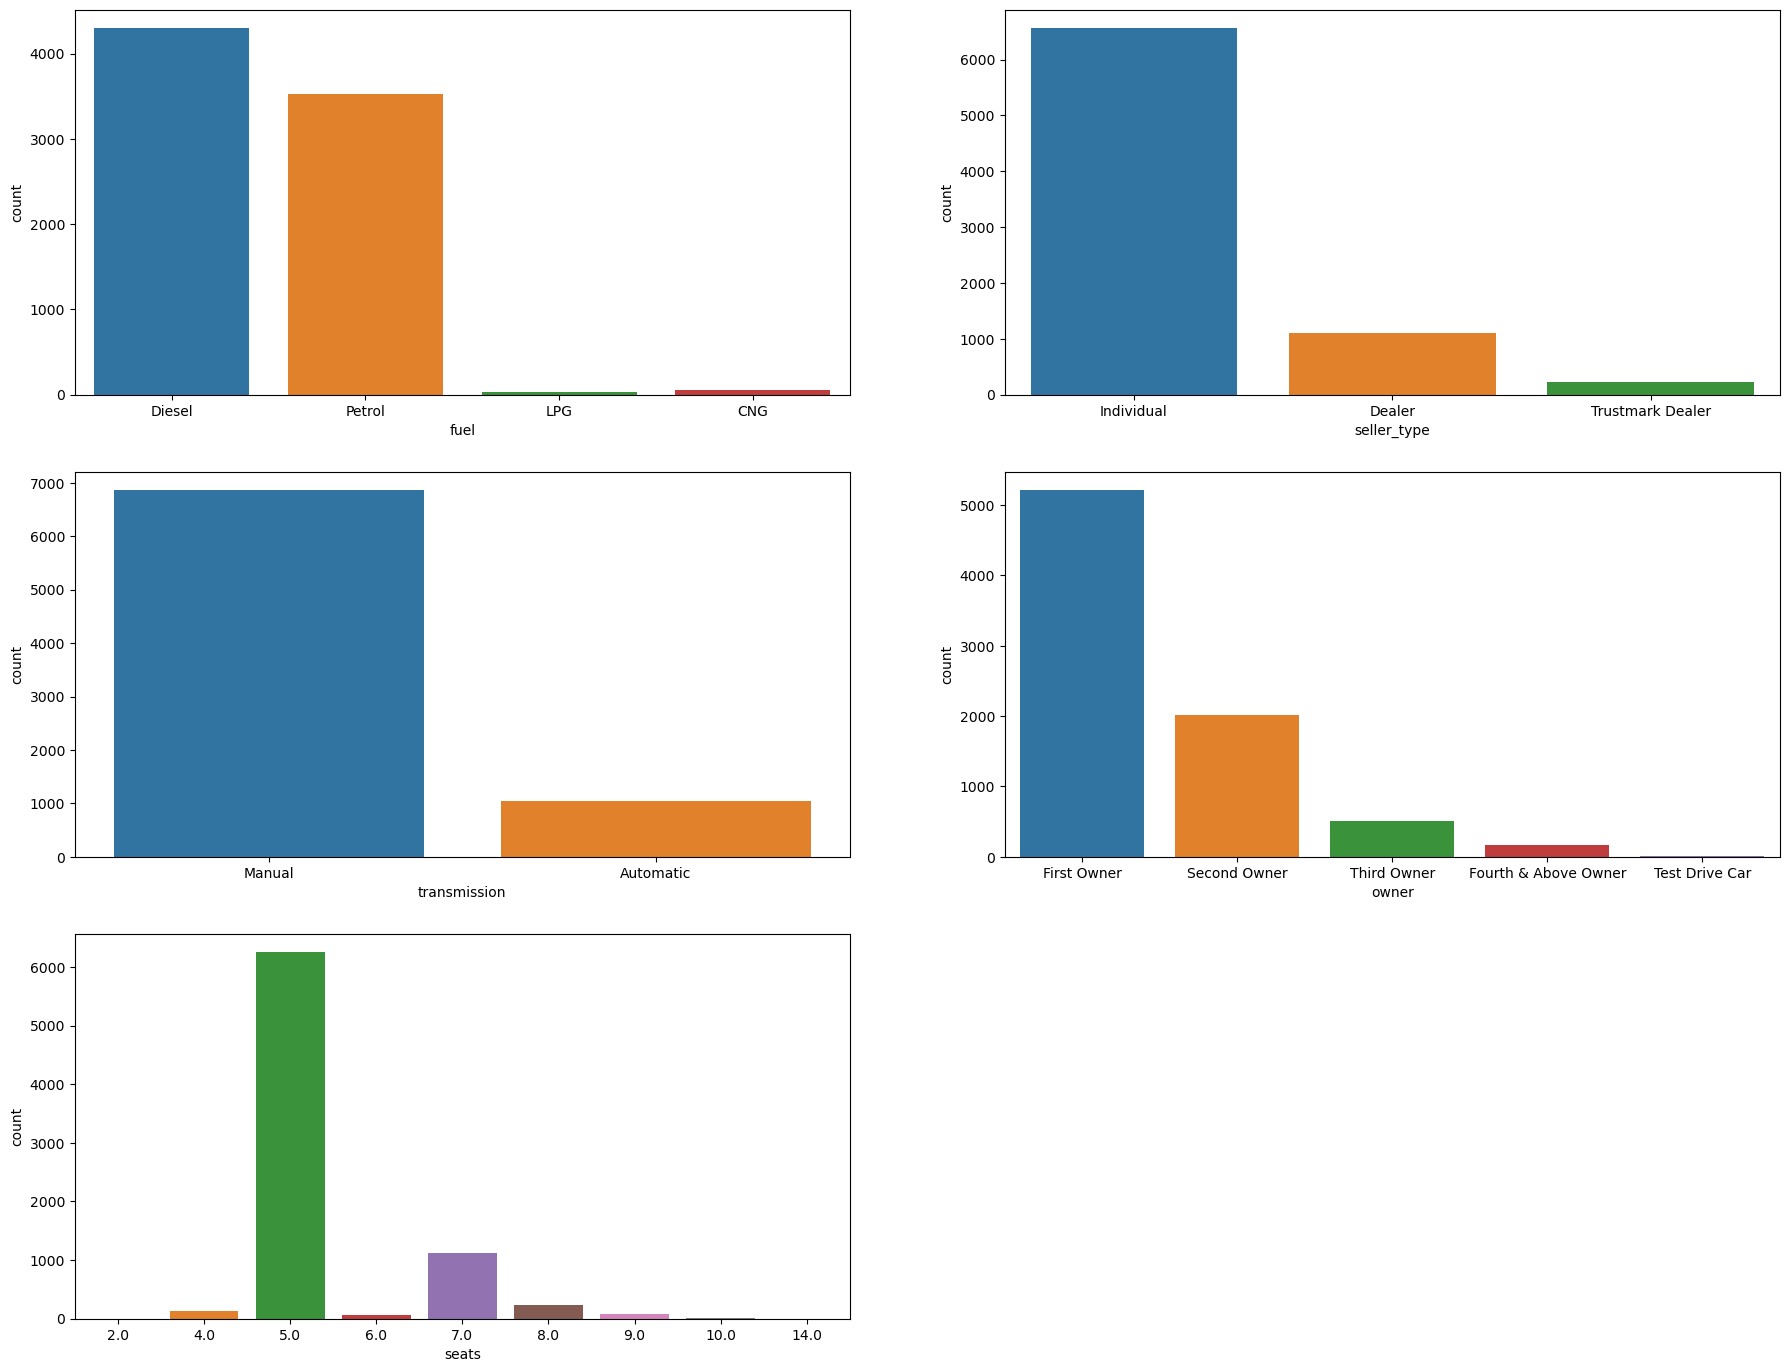

In [329]:
discrete_col=['fuel','seller_type','transmission','owner','seats']
num_row=3
num_col=2
i=0
while(i<len(discrete_col)):
    plt.figure(figsize=[22,17])
    j=0
    while(j<num_row*num_col and j<len(discrete_col)):
        plt.subplot(num_row, num_col, j+1)
        sns.countplot(x=discrete_col[i],data=df)
        i+=1
        j+=1


    

## Findings:
* Disel Fuel , individual Seller , Manual Transimission , First owner and 5 seats are the most in this data set 

In [330]:
df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,9
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,9
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,13
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,10
8124,Hyundai Verna CRDi SX,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,16
8125,Maruti Swift Dzire ZDi,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,14
8126,Tata Indigo CR4,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,10


In [331]:
def Convert_col_to_numeric(w):
    we=str(w)
    word=we.split(' ')
    if len(word) ==2:
        return float (word[0])
    try:
        return float (we)
    except:
         return None

   
  

In [332]:
df.mileage=df.mileage.apply(Convert_col_to_numeric)
df


,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,9
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,9
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,13
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,10
8124,Hyundai Verna CRDi SX,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,16
8125,Maruti Swift Dzire ZDi,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,14
8126,Tata Indigo CR4,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,10


In [333]:
df.engine=df.engine.apply(Convert_col_to_numeric)
df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0,9
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0,9
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0,13
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85 bhp,113.7Nm@ 4000rpm,5.0,10
8124,Hyundai Verna CRDi SX,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,16
8125,Maruti Swift Dzire ZDi,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9 bhp,190Nm@ 2000rpm,5.0,14
8126,Tata Indigo CR4,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70 bhp,140Nm@ 1800-3000rpm,5.0,10


In [334]:
def convert_max_power_to_num(x):
    print("Converting:", x)
    if pd.isnull(x) or not x.strip():
        return None
    x = str(x)
    tokens = x.split(' ')
    if len(tokens) == 2:
        return float(tokens[0])
    try:
        return float(x)
    except ValueError as e:
        print("Error:", e)
        print("Value causing error:", x)
        return None
    
    

In [335]:
df['max_power'] = df['max_power'].replace(' bhp', np.nan)
df['max_power']=df['max_power'].apply(Convert_col_to_numeric)
df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,9
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,9
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,17
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,13
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0,10
8124,Hyundai Verna CRDi SX,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,16
8125,Maruti Swift Dzire ZDi,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,190Nm@ 2000rpm,5.0,14
8126,Tata Indigo CR4,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0,10


In [336]:
df["car_brand_name"] = df["name"].str.extract('([^\s]+)')
df["car_brand_name"] = df["car_brand_name"].astype("category")
df.drop('name',axis=1,inplace=True)
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_age,car_brand_name
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,9,Maruti
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,9,Skoda
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,17,Honda
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,13,Hyundai
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,16,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0,10,Hyundai
8124,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,16,Hyundai
8125,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,190Nm@ 2000rpm,5.0,14,Maruti
8126,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0,10,Tata


In [337]:
df=df.drop(['torque'],axis=1,)
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age,car_brand_name
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,9,Maruti
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,9,Skoda
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,17,Honda
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,13,Hyundai
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,16,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,10,Hyundai
8124,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,16,Hyundai
8125,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,14,Maruti
8126,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0,10,Tata


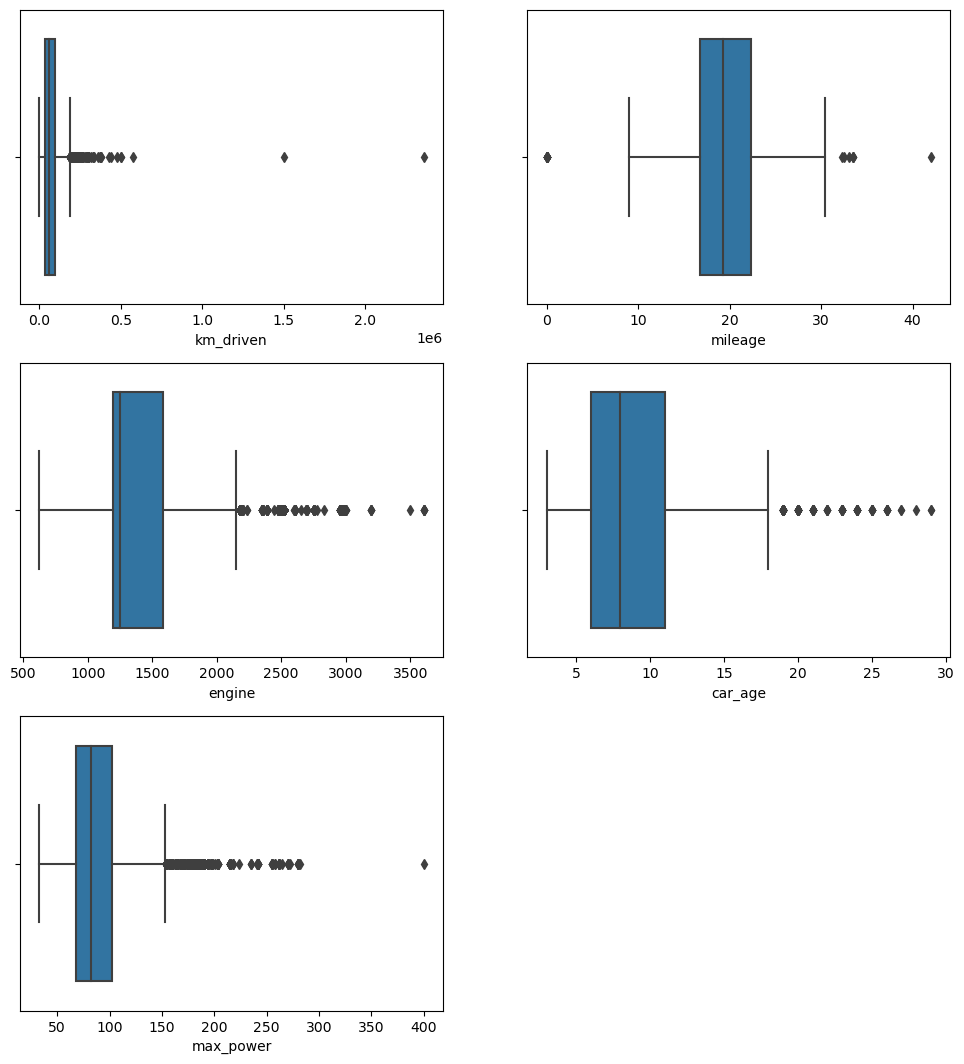

In [338]:
continious_col=['km_driven','mileage','engine','car_age','max_power',]
num_rows=3
num_cols=2
i=0 
while (i<len(continious_col)):
    plt.figure(figsize=[12,13])
    j=0
    while(j<num_cols*num_rows and j<len(continious_col)):
        plt.subplot(num_row, num_col, j+1)
        sns.boxplot(x=continious_col[i],data=df)
        j+=1
        i+=1   

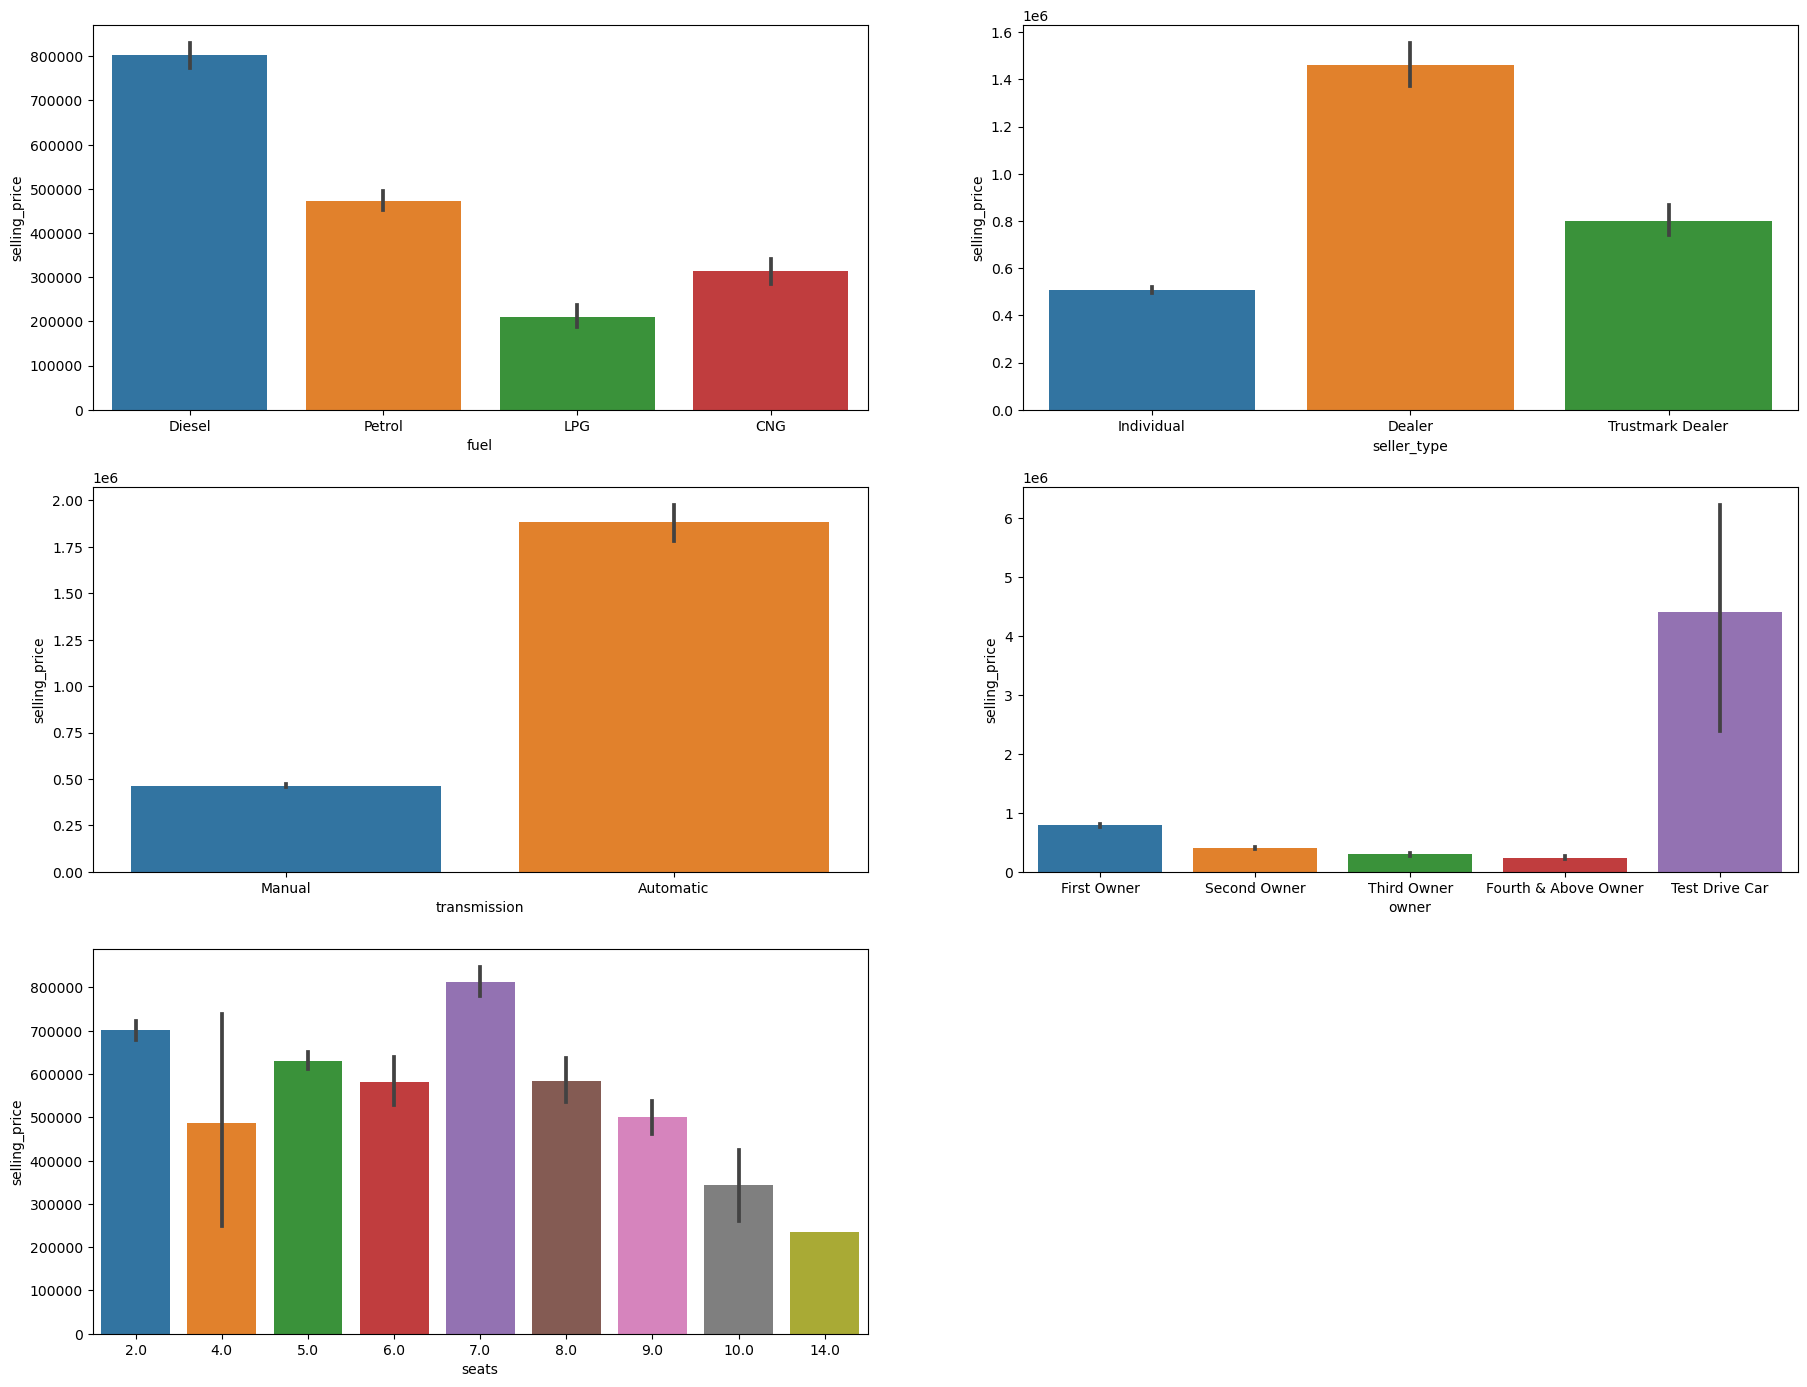

In [339]:
discrete_col=['fuel','seller_type','transmission','owner','seats']
num_row=3
num_col=2
i=0
while(i<len(discrete_col)):
    plt.figure(figsize=[22,17])
    j=0
    while(j<num_row*num_col and j<len(discrete_col)):
        plt.subplot(num_row, num_col, j+1)
        sns.barplot(x=discrete_col[i],data=df,y=df['selling_price'])
        i+=1
        j+=1


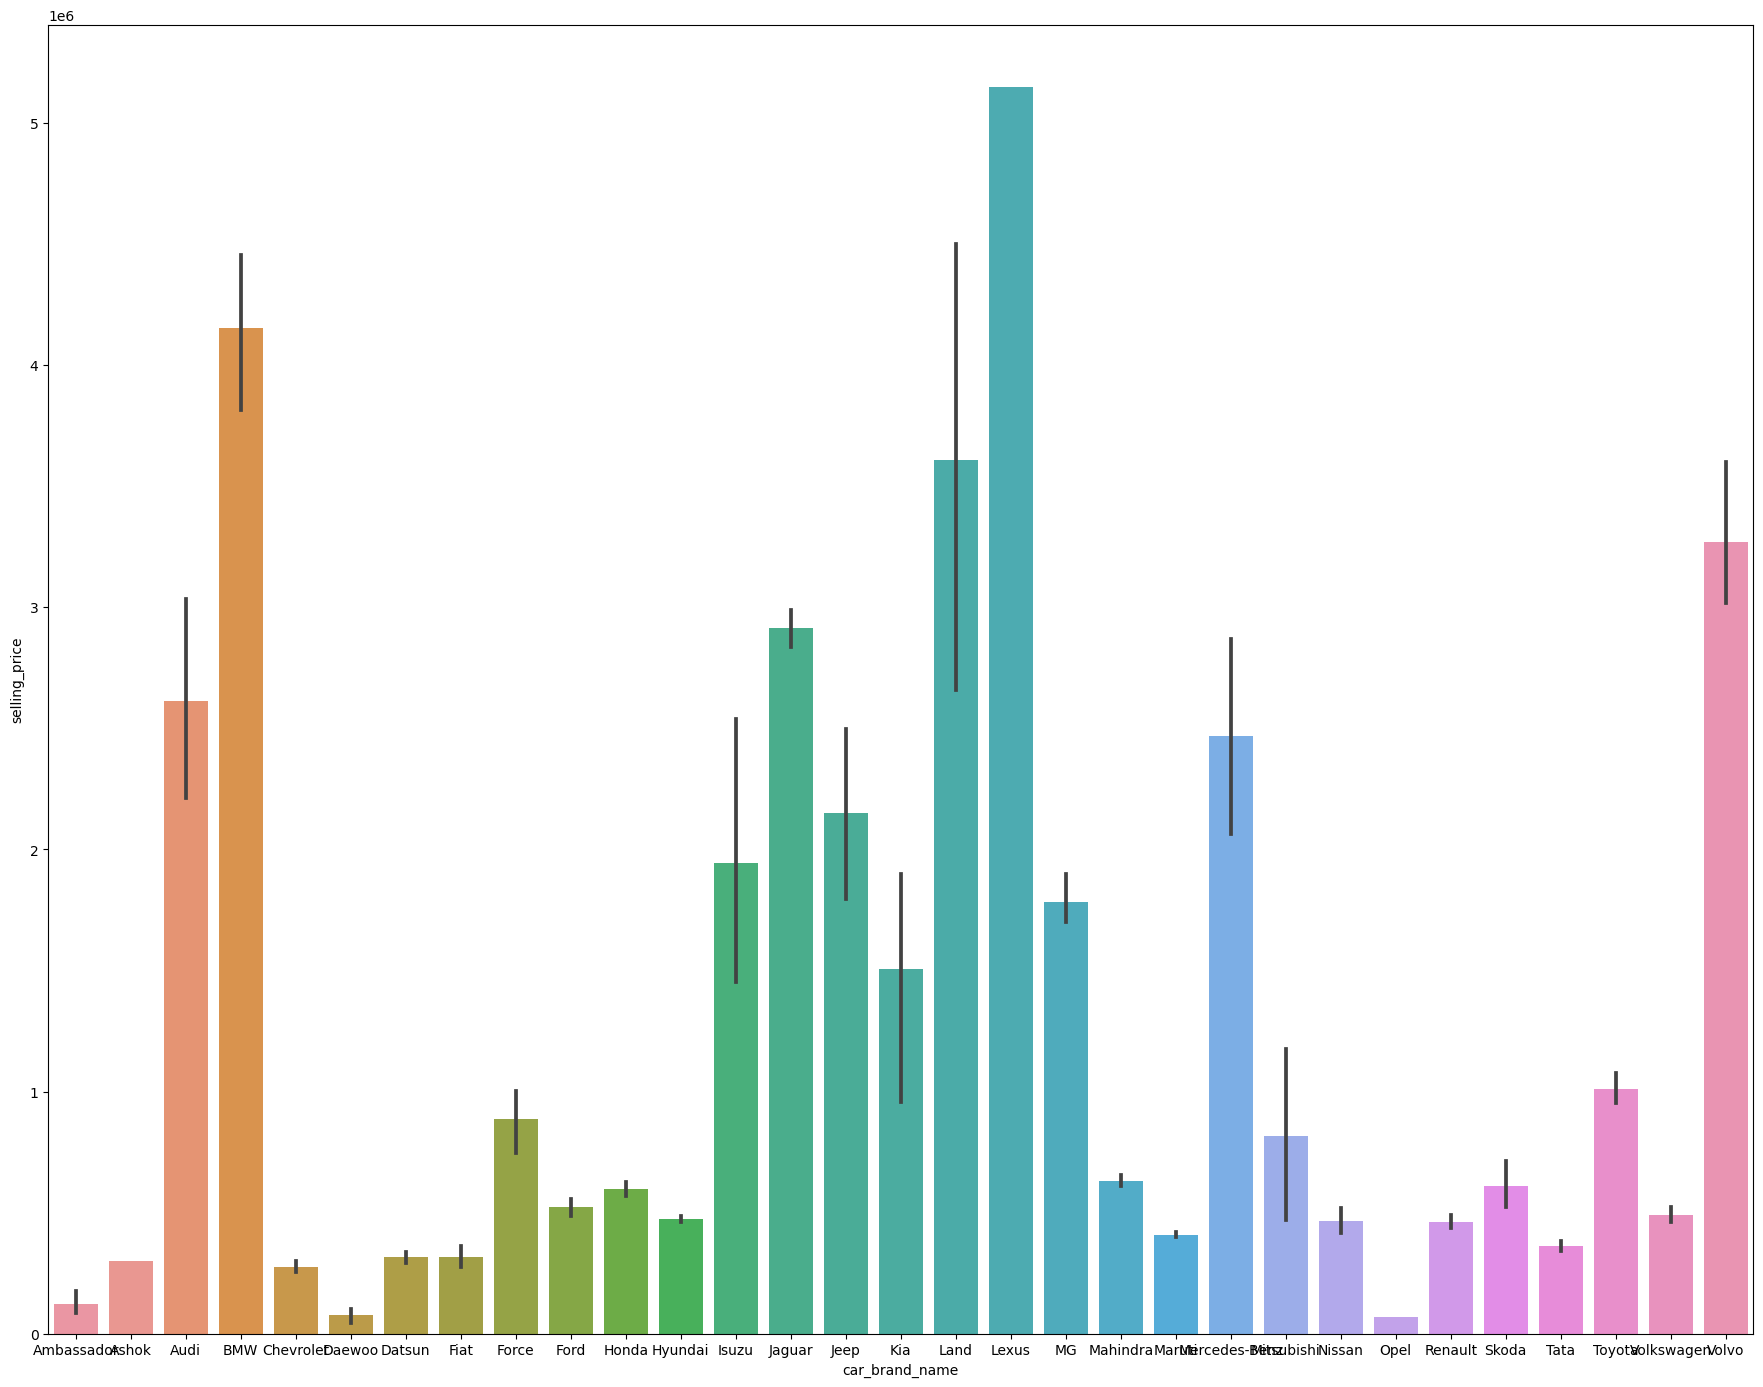

In [340]:
plt.figure(figsize=[22,17])
sns.barplot(x=df['car_brand_name'],data=df,y=df['selling_price'])
plt.show()

## Findings:
* prices go higher with Diesel,Dealer,Automatic,Test Drive Car,Lexus cars and 7 seats.
 

In [341]:
def check_others(brand):
    if brand.lower() in ['ambassador', 'ashok', 'chevrolet', 'daewoo', 'datsun',
                         'fiat', 'force', 'ford', 'honda', 'hyundai', 'isuzu', 'jeep',
                         'kia', 'mg', 'mahindra', 'maruti', 'mercedes-benz', 'mitsubishi', 'nissan',
                         'opel', 'renault', 'skoda', 'tata', 'toyota', 'volkswagen']:
        return 1
    else:
        return 0

In [342]:
df['other brands'] = df['car_brand_name'].apply(lambda x: check_others(x))
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age,car_brand_name,other brands
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,9,Maruti,1
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,9,Skoda,1
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,17,Honda,1
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,13,Hyundai,1
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,16,Maruti,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,10,Hyundai,1
8124,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,16,Hyundai,1
8125,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,14,Maruti,1
8126,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0,10,Tata,1


In [343]:
def check_brand(brand):
    if brand.lower() in ['ambassador', 'ashok', 'chevrolet', 'daewoo', 'datsun',
                         'fiat', 'force', 'ford', 'honda', 'hyundai', 'isuzu', 'jeep',
                         'kia', 'mg', 'mahindra', 'maruti', 'mercedes-benz', 'mitsubishi', 'nissan',
                         'opel', 'renault', 'skoda', 'tata', 'toyota', 'volkswagen']:
        return 0
    else:
        return brand

In [344]:
df['car_brand_name'] =df['car_brand_name'].apply(check_brand)

In [345]:
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age,car_brand_name,other brands
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,9,0,1
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,9,0,1
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,17,0,1
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,13,0,1
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,16,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,10,0,1
8124,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,16,0,1
8125,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,14,0,1
8126,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0,10,0,1


In [346]:
dff=pd.get_dummies(df['car_brand_name'],prefix='brand')
dff['brand_0'].value_counts()

1    7571
0     336
Name: brand_0, dtype: int64

In [347]:
dff.drop('brand_0', inplace=True, axis=1)
dff

,brand_Audi,brand_BMW,brand_Jaguar,brand_Land,brand_Lexus,brand_Volvo
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
8123,0,0,0,0,0,0
8124,0,0,0,0,0,0
8125,0,0,0,0,0,0
8126,0,0,0,0,0,0


In [348]:
df=pd.concat([df,dff],axis=1)
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age,car_brand_name,other brands,brand_Audi,brand_BMW,brand_Jaguar,brand_Land,brand_Lexus,brand_Volvo
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,9,0,1,0,0,0,0,0,0
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,9,0,1,0,0,0,0,0,0
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,17,0,1,0,0,0,0,0,0
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,13,0,1,0,0,0,0,0,0
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,16,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,10,0,1,0,0,0,0,0,0
8124,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,16,0,1,0,0,0,0,0,0
8125,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,14,0,1,0,0,0,0,0,0
8126,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0,10,0,1,0,0,0,0,0,0


In [349]:
column_values = df.iloc[:, 9]
unique_attributes = column_values.unique().tolist()
print(unique_attributes)


[5.0, 4.0, 7.0, 8.0, 6.0, 9.0, 10.0, 14.0, 2.0]


In [350]:
df=df.drop('car_brand_name',axis=1)
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age,other brands,brand_Audi,brand_BMW,brand_Jaguar,brand_Land,brand_Lexus,brand_Volvo
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,9,1,0,0,0,0,0,0
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,9,1,0,0,0,0,0,0
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,17,1,0,0,0,0,0,0
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,13,1,0,0,0,0,0,0
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,16,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,10,1,0,0,0,0,0,0
8124,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,16,1,0,0,0,0,0,0
8125,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,14,1,0,0,0,0,0,0
8126,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0,10,1,0,0,0,0,0,0


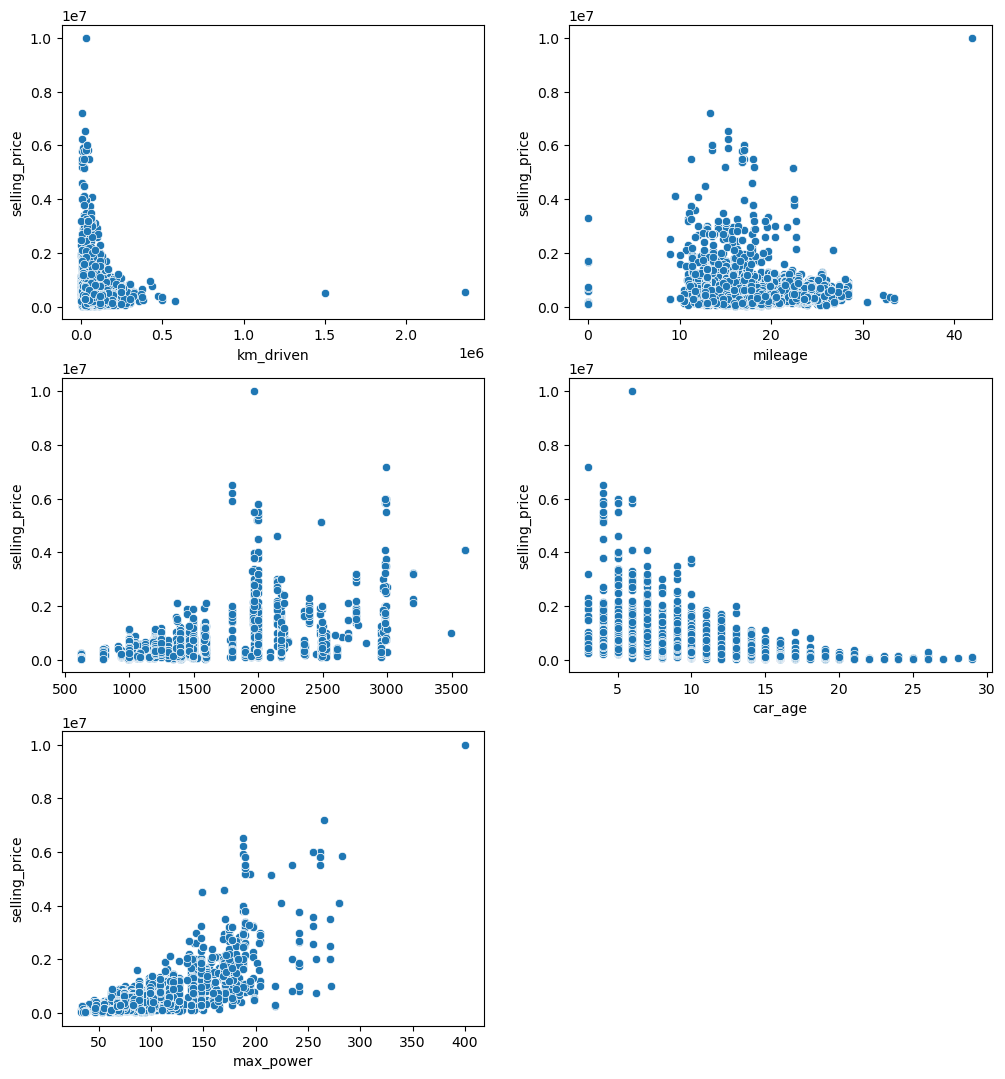

In [351]:
continious_col=['km_driven','mileage','engine','car_age','max_power']
num_rows=3
num_cols=2
i=0 
while (i<len(continious_col)):
    plt.figure(figsize=[12,13])
    j=0
    while(j<num_cols*num_rows and j<len(continious_col)):
        plt.subplot(num_row, num_col, j+1)
        sns.scatterplot(x=continious_col[i],data=df,y=df['selling_price'])
        j+=1
        i+=1   

## Findings :
* as the age,KM_Driven dicrease the price increaed.
* Most Mileage to increase the price is between 10,20.
* as the engine  and max_power increase the price increase.

In [352]:
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age,other brands,brand_Audi,brand_BMW,brand_Jaguar,brand_Land,brand_Lexus,brand_Volvo
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,9,1,0,0,0,0,0,0
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,9,1,0,0,0,0,0,0
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,17,1,0,0,0,0,0,0
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,13,1,0,0,0,0,0,0
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,16,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,10,1,0,0,0,0,0,0
8124,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,16,1,0,0,0,0,0,0
8125,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,14,1,0,0,0,0,0,0
8126,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0,10,1,0,0,0,0,0,0


In [353]:
Encode_list=['fuel','fuel','seller_type','owner','transmission',]
encoder= LabelEncoder()
for i in Encode_list:
    df[i]=encoder.fit_transform(df[i])


In [354]:
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age,other brands,brand_Audi,brand_BMW,brand_Jaguar,brand_Land,brand_Lexus,brand_Volvo
0,450000,145500,1,1,1,0,23.40,1248.0,74.00,5.0,9,1,0,0,0,0,0,0
1,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0,9,1,0,0,0,0,0,0
2,158000,140000,3,1,1,4,17.70,1497.0,78.00,5.0,17,1,0,0,0,0,0,0
3,225000,127000,1,1,1,0,23.00,1396.0,90.00,5.0,13,1,0,0,0,0,0,0
4,130000,120000,3,1,1,0,16.10,1298.0,88.20,5.0,16,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,3,1,1,0,18.50,1197.0,82.85,5.0,10,1,0,0,0,0,0,0
8124,135000,119000,1,1,1,1,16.80,1493.0,110.00,5.0,16,1,0,0,0,0,0,0
8125,382000,120000,1,1,1,0,19.30,1248.0,73.90,5.0,14,1,0,0,0,0,0,0
8126,290000,25000,1,1,1,0,23.57,1396.0,70.00,5.0,10,1,0,0,0,0,0,0


In [355]:
crr=df.corr()
crr

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age,other brands,brand_Audi,brand_BMW,brand_Jaguar,brand_Land,brand_Lexus,brand_Volvo
selling_price,1.000000,-0.222196,-0.193116,-0.337035,-0.590279,-0.224481,-0.126054,0.455734,0.749674,0.041358,-0.412268,-0.770173,0.172015,0.530167,0.265111,0.100221,0.363535,0.297987
km_driven,-0.222196,1.000000,-0.270517,0.120532,0.201207,0.281990,-0.173073,0.205914,-0.038159,0.227336,0.428434,0.149730,-0.019207,-0.085035,-0.065449,-0.015276,-0.056928,-0.089570
fuel,-0.193116,-0.270517,1.000000,0.110176,-0.034924,-0.030955,-0.082886,-0.485995,-0.282335,-0.342048,0.039510,0.132957,-0.045427,-0.102887,-0.084401,-0.024434,0.072956,-0.079213
seller_type,-0.337035,0.120532,0.110176,1.000000,0.230123,0.142461,-0.019916,-0.091891,-0.248180,0.052758,0.144430,0.337836,-0.078975,-0.210126,-0.193029,-0.050181,-0.147247,-0.085536
transmission,-0.590279,0.201207,-0.034924,0.230123,1.000000,0.148513,0.178830,-0.283237,-0.541870,0.072821,0.248972,0.541028,-0.183127,-0.316102,-0.244460,-0.070772,-0.168770,-0.237414
owner,-0.224481,0.281990,-0.030955,0.142461,0.148513,1.000000,-0.162648,0.011132,-0.107059,0.029179,0.472560,0.101167,-0.005341,-0.050400,-0.060170,-0.002826,-0.043076,-0.058307
mileage,-0.126054,-0.173073,-0.082886,-0.019916,0.178830,-0.162648,1.000000,-0.575831,-0.374621,-0.452085,-0.329145,0.103104,-0.064371,-0.060746,-0.068239,-0.059722,0.048042,-0.042846
engine,0.455734,0.205914,-0.485995,-0.091891,-0.283237,0.011132,-0.575831,1.000000,0.703975,0.610309,-0.018848,-0.275506,0.100824,0.158966,0.114097,0.032834,0.134119,0.094949
max_power,0.749674,-0.038159,-0.282335,-0.248180,-0.541870,-0.107059,-0.374621,0.703975,1.000000,0.191999,-0.226598,-0.577295,0.198416,0.359003,0.242759,0.044514,0.226095,0.217358
seats,0.041358,0.227336,-0.342048,0.052758,0.072821,0.029179,-0.452085,0.610309,0.191999,1.000000,0.009144,0.083650,-0.008674,-0.061064,-0.041340,0.026325,-0.028540,-0.041586


<Axes: >

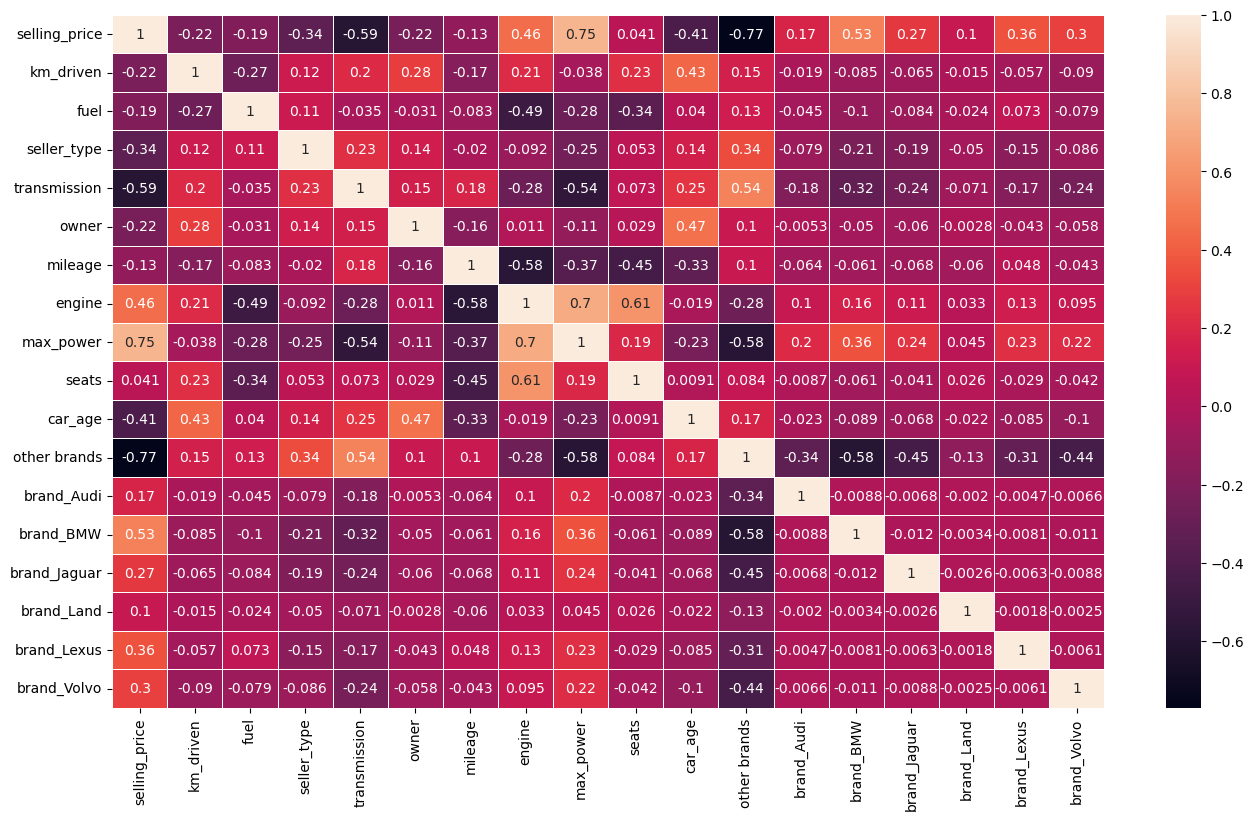

In [356]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(crr,annot=True,linewidths=0.6,ax=ax)

## Findings :
* the most collerated with price is Max_power with 75% then engine with 46%.
* name also Collerated with the price "brand".

In [357]:
print(df.columns.tolist())

['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats', 'car_age', 'other brands', 'brand_Audi', 'brand_BMW', 'brand_Jaguar', 'brand_Land', 'brand_Lexus', 'brand_Volvo']


In [358]:
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age,other brands,brand_Audi,brand_BMW,brand_Jaguar,brand_Land,brand_Lexus,brand_Volvo
0,450000,145500,1,1,1,0,23.40,1248.0,74.00,5.0,9,1,0,0,0,0,0,0
1,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0,9,1,0,0,0,0,0,0
2,158000,140000,3,1,1,4,17.70,1497.0,78.00,5.0,17,1,0,0,0,0,0,0
3,225000,127000,1,1,1,0,23.00,1396.0,90.00,5.0,13,1,0,0,0,0,0,0
4,130000,120000,3,1,1,0,16.10,1298.0,88.20,5.0,16,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,3,1,1,0,18.50,1197.0,82.85,5.0,10,1,0,0,0,0,0,0
8124,135000,119000,1,1,1,1,16.80,1493.0,110.00,5.0,16,1,0,0,0,0,0,0
8125,382000,120000,1,1,1,0,19.30,1248.0,73.90,5.0,14,1,0,0,0,0,0,0
8126,290000,25000,1,1,1,0,23.57,1396.0,70.00,5.0,10,1,0,0,0,0,0,0


In [359]:
nan_rows = df[df['max_power'].isna()]
df.dropna(subset=['max_power'], inplace=True)